#### Homework 4 & 5
##### Author: Raffi Sahakyan
##### Course: Quantitative Tools for Management
##### Professor: Hrant Davtyan

<div style="text-align: justify"> Homework submission for the course Quantitative Tools for Management taught by Dr. Hrant Davtyan as part of the program of Master of Science in Strategic Management at the American University of Armenia. Submitted by Raffi Sahakyan on July 16, 2018. </div>


-  **Problem 1 - Superify 1** (2 points)

<div style="text-align: justify">For this problem create a list of 5 strings (e.g. a list consisting of words like men, women, cool etc.). Create a for loop that will iterate over the elements of the list. If the current element has more than 4 characters, then print that element after adding the prefix super and a space: e.g. superwomen. For all other cases (less than or equal to 4 characters) print that element adding the prefix super without any space: e.g. supercool.</div>

-  **Problem 2 - Stockplotter 1** (2 points)

<div style="text-align: justify">Create a list of 5 stocks (e.g. ["AAPL","GOOGL","IBM","MSFT","FB"]. Use Quandl to download the data on those stocks from the WIKI database (i.e. "WIKI/FB") and plot the opening price for all 5 of them inside one single plot.</div>

-  **Problem 3 - Stockplotter 2** (1 point)

<div style="text-align: justify">Define a function that will get only one argument: stock ticker (name). Once the argument is given the function must download that stock's data from Quandl (WIKI database) and plot it.</div>

-  **Problem 4 - Listpop** (2 points)

<div style="text-align: justify">While append() is a function used to add an element to the list, pop() is a function (again available only for lists) that is used to delete an element. For example, if we have a list my_list = ['a','b','c','d'], then my_list.pop(2) will delete the 2nd (in Python terminology) element of the list: 'c'. Similarly, my_list.pop(-1) will delete the very last element of it: 'd'. The remaining list after those two operations will be my_list = ['a','b'] Create a while loop, that will delete elements from the stock list in Problem 2, as long as the list is not empty (i.e. the while loop must stop once the stock_list becomes empty). Note: make sure not to create an infinite loop.</div>

-  **Problem 5 - Numlength 2** (4 points)

<div style="text-align: justify">Create a list of positive integers with different digits (some one digit, some two digits, some three etc.). For each element in this list check whether that integer has one, two or three (or four, if you have it in your list) digits. The one digit elements to be written into a new list called one_digit, two digit elements into a list called two_digits and so on.</div>

-  **Problem 6 - Superify 2** (2 points)

<div style="text-align: justify">Solve problem 1 with a while loop.</div>

-  **Problem 7 - Descriptive Analytics 1** (4 points)<br><div style="text-align: justify">Use Quandl to get data on Youth Unemployment in Armenia (Code: FRED/SLUEM1524ZSARM). Based on your data:</div>
 - Plot the unemployment trend over years,
 - Plot the unemployment relative change over years,
 - What was the unemployment rate on 2001?
 - When did Armenia observe the highest rate of unemployment?
 - What are the mean, mode and median of unemployment rates?

-  **Problem 8 - Descriptive Analytics 2** (3 points)
<br><div style="text-align: justify">Use Quandl to get data on monthly median listing property price in Armenia oer sq. foot (Code: ZILLOW/C25499_MLPFAH). Based on your data:</div>
 - Calculate how many times the median price has been in the open range (160,170),
 - Plot the histogram of prices with only 15 bins, some specified color and add title for the graph as well as x and y axis,
 - Define a function that will return High, Medium or Low when the price>=170, 170>price>160, 160>=price respectively,
 - Use apply function to create a new column in the dataframe with price classifications,
 - Use pivot tables in pandas to calculate standard deviation of prices in each class.

In [780]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import quandl

%matplotlib inline

**Problem 1 - Superify 1**

In [781]:
list_str = ['cat', 'ship', 'match', 'monkey', 'actor']
assert len(list_str)==5
for string in list_str:
    if type(string)!=str:
        raise ValueError('list must contain strings')
    if len(string) > 4:
        print('super'+' '+string)
    else:
        print('super'+string)

supercat
supership
super match
super monkey
super actor


**Problem 2 - Stockplotter 2**

In [782]:
quandl.ApiConfig.api_key = 'INSERT YOUR API'
selected_ticker_list = ['EL', 'M', 'ESRX', 'GS','MDLZ']
# I have set dates so that all 5 stocks are listed 
#and no null entries are encountered 
data_stock=quandl.get_table('WIKI/PRICES', ticker = selected_ticker_list, 
                            date = { 'gte': '2000-1-3', 'lte': '2017-12-31' },
                            qopts={'columns':['date','open','ticker']}, 
                            paginate=True).set_index('date')
print('\033[1m' + 'Raw Table Head' + '\033[0m')
print(data_stock.head(3))
assert data_stock.notnull().all().all()
#Asserting that there are no null values

Raw Table Head
             open ticker
date                    
2000-01-03  50.44     EL
2000-01-04  49.25     EL
2000-01-05  48.50     EL


In [783]:
data_stock=data_stock.pivot(columns='ticker') #So each stock ticker is in a seperate column
print('\033[1m' + 'Clean Table Head' + '\033[0m')
print(data_stock.head(3))
print('\n')
print('\033[1m' + 'Clean Table Info' + '\033[0m')
print(data_stock.info())
#Obviously there are some null entries since MDLZ made IPO in 2001

Clean Table Head
             open                          
ticker         EL   ESRX     GS      M MDLZ
date                                       
2000-01-03  50.44  66.25  94.19  50.25  NaN
2000-01-04  49.25  62.31  87.00  49.38  NaN
2000-01-05  48.50  61.31  80.88  49.13  NaN


Clean Table Info
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4527 entries, 2000-01-03 to 2017-12-29
Data columns (total 5 columns):
(open, EL)      4527 non-null float64
(open, ESRX)    4527 non-null float64
(open, GS)      4527 non-null float64
(open, M)       4527 non-null float64
(open, MDLZ)    4163 non-null float64
dtypes: float64(5)
memory usage: 212.2 KB
None


Text(0.5,1,'Open Price Graphs')

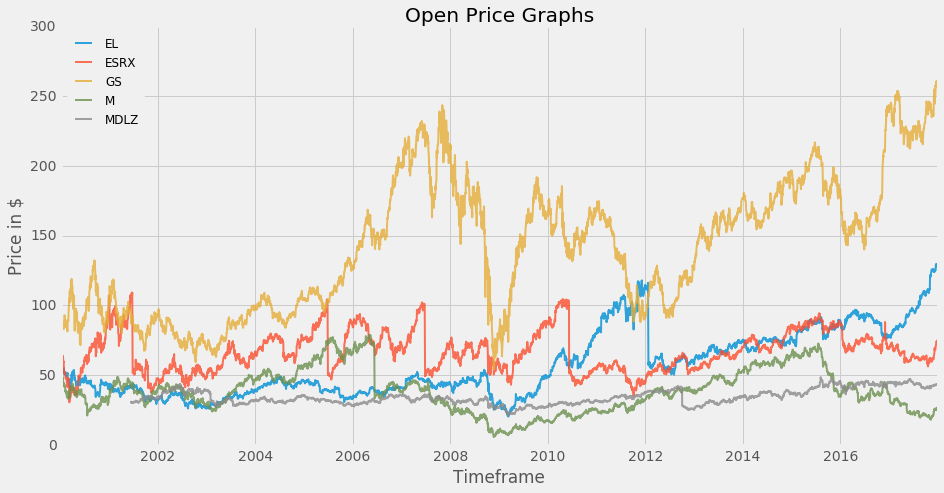

In [784]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(14, 7))
for ticker in data_stock.columns:
    plt.plot(data_stock.index, data_stock[ticker], 
             lw=2, alpha=0.8,label=ticker[1])
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('Price in $')
plt.xlabel('Timeframe')
plt.title("Open Price Graphs")

**Problem 3 - Stockplotter 2**

...Checking - Correct Entry


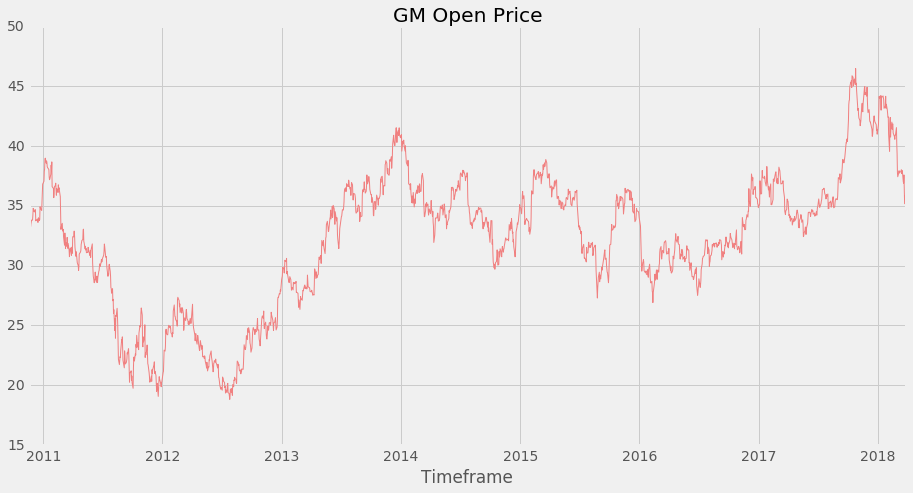

In [785]:
def stock_plotter(stock_ticker): 
    try:
        plt.plot(quandl.get('WIKI/'+stock_ticker).Close, lw = 1, c = 'lightcoral')
        plt.xlabel('Timeframe')
        plt.title(stock_ticker + ' Open Price')
    except:
        print('NotFoundError: Incorrect Quandl Code')
print('\033[1m'+'...Checking - Correct Entry'+'\033[0m')
plt.figure(figsize=(14, 7))
stock_plotter('GM') #General Motors

In [786]:
print('\033[1m'+'...Checking - Incorrect Entry'+'\033[0m')
stock_plotter('Any Wrong Entry')

...Checking - Incorrect Entry
NotFoundError: Incorrect Quandl Code


**Problem 4 - Listpop**

In [787]:
print('\033[1m'+'Before'+'\033[0m')
print(selected_ticker_list)
print('\n')
while len(selected_ticker_list)!=0:
    selected_ticker_list.pop(-1)
print('\033[1m'+'After'+'\033[0m')
print(selected_ticker_list)

Before
['EL', 'M', 'ESRX', 'GS', 'MDLZ']


After
[]


**Problem 5 - Numlength 2**

In [788]:
pos_int_list=[85, 7, 62, 1331, 17, 318, 46, 101, 8, 87, 20]
one_digit = []
two_digit = []
three_digit = []
four_digit = []
more_than_four_digit = []

In [789]:
def num_digits(l):
    for i in l:
        if i < 1 or type(i)!=int:
            raise ValueError('list must contain positive integers')
        if i<10:
            one_digit.append(i)
        elif len(str(i)) ==2:
            two_digit.append(i)
        elif len(str(i)) ==3:
            three_digit.append(i)
        elif len(str(i)) ==4:
            four_digit.append(i)
        else: 
            more_than_four_digit.append(i)

In [790]:
num_digits(pos_int_list)
print('\033[1m'+'One Digit List'+'\033[0m')
print(one_digit)
print('\033[1m'+'Two Digits List'+'\033[0m')
print(two_digit)
print('\033[1m'+'Three Digits List'+'\033[0m')
print(three_digit)
print('\033[1m'+'Four Digits List'+'\033[0m')
print(four_digit)
print('\033[1m'+'More Than Four Digits List'+'\033[0m')
print(more_than_four_digit)

One Digit List
[7, 8]
Two Digits List
[85, 62, 17, 46, 87, 20]
Three Digits List
[318, 101]
Four Digits List
[1331]
More Than Four Digits List
[]


**Problem 6 - Superify 2**

In [791]:
word = 0
while word < len(list_str):
    if type(list_str[word])!=str:
            raise ValueError('list must contain strings')
    if len(list_str[word])>4:
        print('super'+' '+ list_str[word])
    else:
        print('super'+ list_str[word])
    word += 1

supercat
supership
super match
super monkey
super actor


**Problem 7 - Descriptive Analytics 1**

In [792]:
data_unemp = quandl.get('FRED/SLUEM1524ZSARM')
print('\033[1m'+'Youth Unemployment in Armenia'+'\033[0m')
data_unemp.head(3)

Youth Unemployment in Armenia


,Value
Date,
1991-01-01,4.507
1992-01-01,3.866
1993-01-01,11.425


In [793]:
print('\033[1m' + 'Info' + '\033[0m')
data_unemp.info()
print('\n')
print('\033[1m' + 'Data Description' + '\033[0m')
data_unemp.describe()

Info
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 27 entries, 1991-01-01 to 2017-01-01
Data columns (total 1 columns):
Value    27 non-null float64
dtypes: float64(1)
memory usage: 432.0 bytes


Data Description


,Value
count,27.000000
mean,24.942815
std,10.865576
min,3.866000
25%,18.662000
50%,22.882000
75%,35.676500
max,40.818001


In [794]:
print('Maximum Unemployment')
unemp_max = data_unemp.loc[data_unemp['Value'].idxmax()]
print(unemp_max)

Maximum Unemployment
Value    40.818001
Name: 2009-01-01 00:00:00, dtype: float64


In [795]:
print('Unemployment in 2001')
print(data_unemp.loc['2001'])

Unemployment in 2001
                Value
Date                 
2001-01-01  21.724001


In [796]:
print('Mean')
print(data_unemp.mean())
print('\n')
print('Mode')
print(data_unemp.Value.round().mode()) 
#Since entries are floats there is no mode
#Rounding to get the mode 
print('\n')
print('Median')
print(data_unemp.median())

Mean
Value    24.942815
dtype: float64


Mode
0    39.0
dtype: float64


Median
Value    22.882
dtype: float64


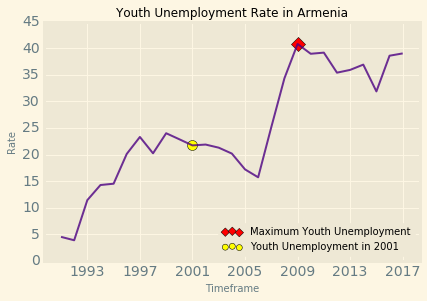

In [797]:
plt.style.use("Solarize_Light2")
plt.plot(data_unemp,lw=2, alpha=0.8, color = 'indigo', label = '_nolegend_')
plt.scatter(x=data_unemp['Value'].idxmax(), y=unemp_max, c='red', 
            marker='D', s=100, label = 'Maximum Youth Unemployment', edgecolors='k')
plt.scatter(x=data_unemp.loc['2001'].index, y=data_unemp.loc['2001'].Value, c='yellow', 
            marker='o', s=100, label = 'Youth Unemployment in 2001', edgecolors='k')
plt.ylabel('Rate', fontsize=10)
plt.xlabel('Timeframe', fontsize=10)
plt.title('Youth Unemployment Rate in Armenia', fontsize=12)
plt.legend(loc='lower right', fontsize=10, markerscale=0.6) 

Text(0.5,1,'Youth Unemployment Relative Change in Armenia')

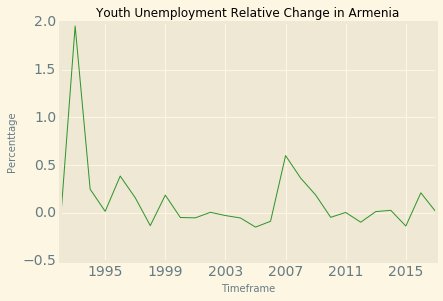

In [798]:
plt.plot(data_unemp.pct_change(),lw=1, alpha=0.8, 
         color = 'green', label = '_nolegend_')
plt.ylabel('Percenttage', fontsize=10)
plt.xlabel('Timeframe', fontsize=10)
plt.title('Youth Unemployment Relative Change in Armenia', fontsize=12)

**Problem 8 - Descriptive Analytics 2**

In [799]:
data_property = quandl.get('ZILLOW/C25499_MLPFAH')
print('\033[1m'+'Monthly Listing Property Price in RA'+'\033[0m')
data_property.head(3)

Monthly Listing Property Price in RA


,Value
Date,
2013-04-30,178.571429
2013-05-31,178.571429
2013-06-30,185.380865


In [800]:
print('\033[1m' + 'Info' + '\033[0m')
data_property.info()
print('\n')
print('\033[1m' + 'Data Description' + '\033[0m')
data_property.describe()

Info
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2013-04-30 to 2018-03-31
Data columns (total 1 columns):
Value    60 non-null float64
dtypes: float64(1)
memory usage: 960.0 bytes


Data Description


,Value
count,60.000000
mean,156.845314
std,10.257480
min,142.410714
25%,149.107143
50%,152.957085
75%,165.719697
max,185.380865


In [801]:
print('Number of Values in the open range')
len(data_property[data_property['Value'].between(160, 170, inclusive=False)])

Number of Values in the open range


13

Text(0.5,1,'Monthly median listing property price in Armenia')

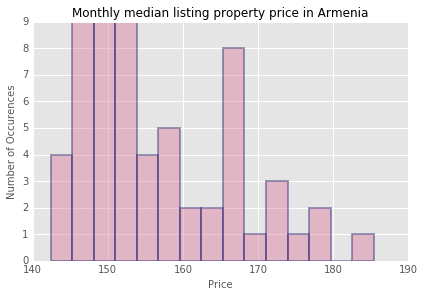

In [802]:
plt.style.use("ggplot")
sns.distplot(data_property, kde=False, bins = 15, color='palevioletred', 
             hist_kws=dict(edgecolor="midnightblue", linewidth=2))
plt.ylabel('Number of Occurences', fontsize=10)
plt.xlabel('Price', fontsize=10)
plt.title('Monthly median listing property price in Armenia', fontsize=12)

In [803]:
def getCategory(price):
    if price>=170:
        return 'High'
    elif 160<price<170:
        return 'Medium'
    else:
        return 'Low'

In [804]:
data_property['Price_Classifications'] = data_property['Value'].apply(getCategory)
print('\033[1m'+'Monthly Listing Property Price in RA - Categorized'+'\033[0m')
data_property.head(3)

Monthly Listing Property Price in RA - Categorized


,Value,Price_Classifications
Date,,
2013-04-30,178.571429,High
2013-05-31,178.571429,High
2013-06-30,185.380865,High


In [805]:
data_property_pivot = pd.pivot_table(data_property, index = ['Price_Classifications'],
                                      values = ['Value'], 
                                     aggfunc={'Value':[np.std, np.mean, np.sum, min, max, np.median, np.ptp, np.var]})
print('\033[1m'+'Monthly Listing Property Price in RA - Description'+'\033[0m')
print(data_property_pivot)

Monthly Listing Property Price in RA - Description
                            Value                                      \
                              max        mean      median         min   
Price_Classifications                                                   
High                   185.380865  176.493509  176.747442  171.289349   
Low                    158.990168  150.560099  150.615718  142.410714   
Medium                 169.025157  165.604641  166.272727  160.929092   

                                                                    
                             ptp       std          sum        var  
Price_Classifications                                               
High                   14.091516  4.960363  1235.454563  24.605202  
Low                    16.579453  4.289230  6022.403948  18.397498  
Medium                  8.096065  2.284924  2152.860330   5.220879  
